# Linear Regression BodyWeight - Brain Weight

In [15]:
# importing libraries
import pandas as pd
import numpy as np

In [45]:
body_brain_weights_df

,Index,BrainWeight,BodyWeight
0,1,3.385,44.50
1,2,0.480,15.50
2,3,1.350,8.10
3,4,465.000,423.00
4,5,36.330,119.50
5,6,27.660,115.00
6,7,14.830,98.20
7,8,1.040,5.50
8,9,4.190,58.00
9,10,0.425,6.40


In [22]:
# reading the input data from txt file
body_brain_weights_df = pd.read_table('bodybrainweights.txt',delim_whitespace=True, 
                   header=None,comment='#', names=["Index", "BrainWeight", "BodyWeight"])
body_brain_weights_df.head()

,Index,BrainWeight,BodyWeight
0,1,3.385,44.5
1,2,0.480,15.5
2,3,1.350,8.1
3,4,465.000,423.0
4,5,36.330,119.5


In [30]:
# Get the stastics of the data
body_brain_weights_df["BrainWeight"].describe()


count      62.000000
mean      198.789984
std       899.158011
min         0.005000
25%         0.600000
50%         3.342500
75%        48.202500
max      6654.000000
Name: BrainWeight, dtype: float64

In [29]:
body_brain_weights_df["BodyWeight"].describe()

count      62.000000
mean      283.134194
std       930.278942
min         0.140000
25%         4.250000
50%        17.250000
75%       166.000000
max      5712.000000
Name: BodyWeight, dtype: float64

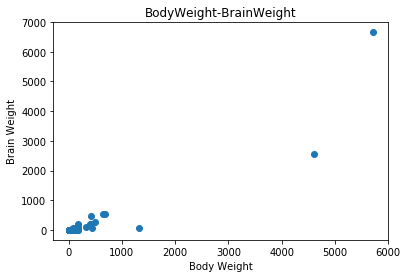

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(body_brain_weights_df['BodyWeight'], body_brain_weights_df['BrainWeight'])
#plt.xlim(0, 600)
#plt.ylim(0, 600)
plt.title("BodyWeight-BrainWeight")
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")
plt.show()

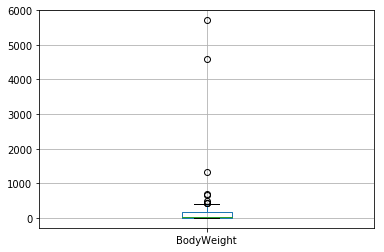

In [40]:
body_brain_weights_df.boxplot(column=['BodyWeight'])

## Finding  outliers

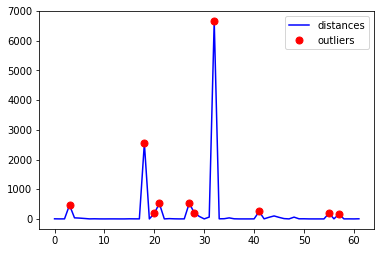

In [36]:
import numpy as np
def is_outlier(value, p25, p75):
    """Check if value is an outlier
    """
    lower = p25 - 1.5 * (p75 - p25)
    upper = p75 + 1.5 * (p75 - p25)
    return value <= lower or value >= upper
 
def get_indices_of_outliers(values):
    """Get outlier indices (if any)
    """
    p25 = np.percentile(values, 25)
    p75 = np.percentile(values, 75)
     
    indices_of_outliers = []
    for ind, value in enumerate(values):
        if is_outlier(value, p25, p75):
            indices_of_outliers.append(ind)
    return indices_of_outliers
 
dist=  body_brain_weights_df['BrainWeight'].values
values = body_brain_weights_df['BrainWeight'].values
indices_of_outliers = get_indices_of_outliers(dist)
 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(dist, 'b-', label='distances')
ax.plot(
    indices_of_outliers,
    values[indices_of_outliers],
    'ro',
    markersize = 7,
    label='outliers')
ax.legend(loc='best')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263D6B34518>]],
      dtype=object)

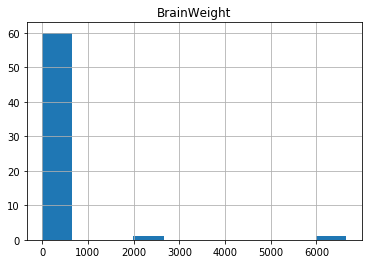

In [33]:
 body_brain_weights_df.hist(column='BrainWeight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000263D68404E0>]],
      dtype=object)

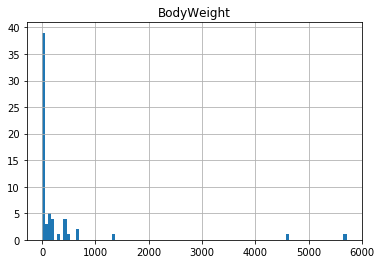

In [34]:
body_brain_weights_df.hist(column='BodyWeight', bins=100)

In [37]:
IQR= body_brain_weights_df[["BrainWeight",'BodyWeight']].quantile(0.75)-body_brain_weights_df[['BrainWeight',"BodyWeight"]].quantile(0.25)
q1=body_brain_weights_df[["BrainWeight"]].quantile(0.25)
q3=body_brain_weights_df[["BrainWeight"]].quantile(0.75)
list1=body_brain_weights_df["BrainWeight"].tolist()
list2=body_brain_weights_df["BodyWeight"].tolist()
ll=q1-1.5*IQR[0]
ul=q3+1.5*IQR[0]
array1=list1>ll[0]
array2= list1<ul[0]
array3=np.logical_and(array1,array2)
body_brain_weights_df_cleaned=body_brain_weights_df[array3]


In [38]:
body_brain_weights_df_cleaned["BrainWeight"].describe()

count     52.000000
mean      11.786135
std       23.094135
min        0.005000
25%        0.388750
50%        1.660000
75%        4.916000
max      100.000000
Name: BrainWeight, dtype: float64

In [39]:
body_brain_weights_df_cleaned["BodyWeight"].describe()

count      52.000000
mean       73.410000
std       195.748303
min         0.140000
25%         3.375000
50%        12.200000
75%        56.500000
max      1320.000000
Name: BodyWeight, dtype: float64

In [41]:
body_brain_weights_df_cleaned.shape

(52, 3)

In [42]:

body_brain_weights_df_cleaned.head()

,Index,BrainWeight,BodyWeight
0,1,3.385,44.5
1,2,0.480,15.5
2,3,1.350,8.1
4,5,36.330,119.5
5,6,27.660,115.0


In [43]:
X = body_brain_weights_df_cleaned['BodyWeight']
y = body_brain_weights_df_cleaned['BrainWeight']
print(X.shape)
print(y.shape)

(52,)
(52,)


In [47]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model = lm.fit(X.values.reshape(-1,1), y)
# print intercept and coefficients
print( linear_model.intercept_)
print( linear_model.coef_)


6.744472481900679
[0.06867814]


In [52]:
linear_model.score(X.values.reshape(-1,1), y)

0.3388672813039192

In [50]:
X_test =[119.5]
print('Predicted Brain Weight')
print(linear_model.predict(np.array([[119.5]])))
print('Actual Brain Weight')
print("36.330")

Predicted Brain Weight
[14.95151001]
Actual Brain Weight
36.330
